<a href="https://colab.research.google.com/github/Tomaz4lves/Biblioteca_pandas/blob/main/regressao_linear_simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [ ]:
#Importando arquivo

alunos = pd.read_excel('aprovacao_alunos.xlsx')

In [ ]:
#Verificação do cabeçalho

alunos.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


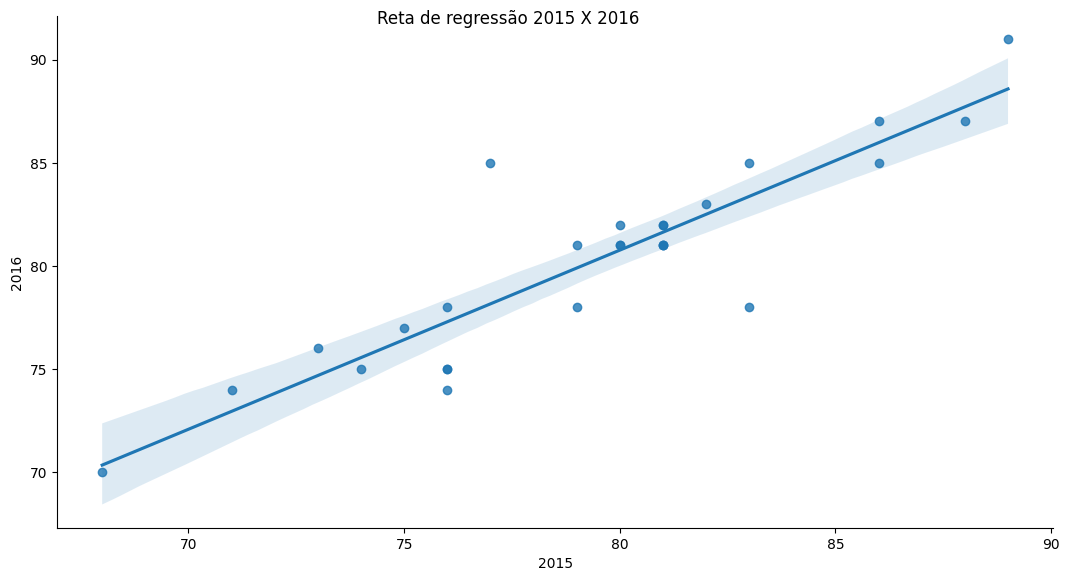

In [ ]:
#Plotando a regressão linear utilizando lmplot do Seaborn

ax = sns.lmplot(x="ano_2015", y="ano_2016", data=alunos)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("Reta de regressão 2015 X 2016")
ax.set_xlabels("2015")
ax.set_ylabels("2016")
ax;

In [ ]:
#Verificando a matriz de correlação

alunos.corr()

<ipython-input-14-8d6a2a5b8151>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  alunos.corr()


,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [ ]:
#Definindo as variaveis dependentes e ajustando o modelo de regressão linear usando OLS

Y = alunos.ano_2016
X = sm.add_constant(alunos.ano_2015)
resultado_regressão = sm.OLS(Y, X).fit()
print(resultado_regressão.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           3.02e-10
Time:                        18:16:22   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [ ]:
alunos["Y_previsto"] = resultado_regressão.predict()
alunos.head()

,UF,ano_2015,ano_2016,Y_previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089


In [ ]:
alunos["residuo"] = alunos["Y_previsto"] - alunos["ano_2016"]
alunos.head()

,UF,ano_2015,ano_2016,Y_previsto,residuo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
